# Explore here

In [1]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos
data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


Paso 2: Preproceso de los Datos

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_url(url):
    # Segmentar la URL utilizando signos de puntuación
    tokens = re.split(r'\W+', url)
    # Convertir a minúsculas y eliminar stopwords
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    # Lematizar
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Aplicar el preprocesamiento a las URLs
data['processed_url'] = data['url'].apply(preprocess_url)

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(data['processed_url'], data['is_spam'], test_size=0.2, random_state=42)

# Verificar división
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2399,) (600,) (2399,) (600,)


In [6]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Construir el pipeline con TfidfVectorizer y SVM
pipeline = make_pipeline(TfidfVectorizer(), SVC())

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar los resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9483333333333334
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       455
        True       0.91      0.88      0.89       145

    accuracy                           0.95       600
   macro avg       0.93      0.92      0.93       600
weighted avg       0.95      0.95      0.95       600



Optimizar Modelo con Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV

# Definir los parametros para el Grid Search
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [1, 0.1, 0.01],
    'svc__kernel': ['rbf', 'linear']
}

# Configurar el Grid Search
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=2)

# Entrenar el modelo optimizado
grid.fit(X_train, y_train)

# Predecir en el conjunto de prueba con el mejor modelo
y_pred_optimized = grid.best_estimator_.predict(X_test)

report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("\nOptimized Model Report")
print(classification_report(y_test, y_pred_optimized))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.3s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.3s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.3s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.3s
[CV] END ..........svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   0.3s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.2s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.2s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.2s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.2s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.2s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   0.2s
[CV] END ........svc__C=0.1, svc__gamma=0.1, svc

Comparar modelo original y modelo optimizado

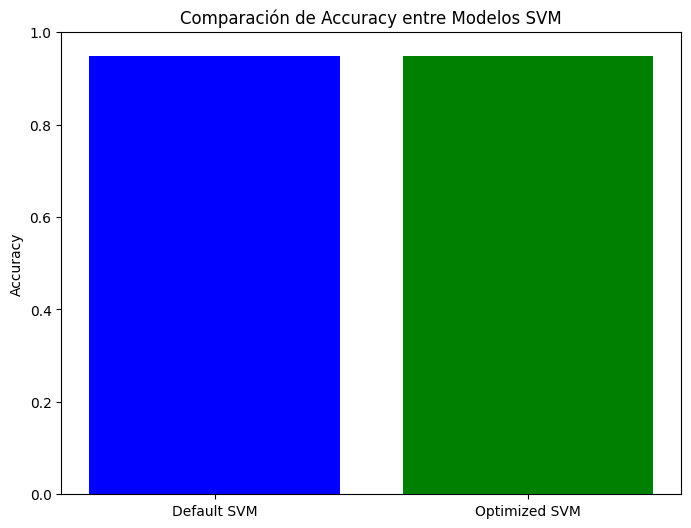

In [9]:
import matplotlib.pyplot as plt

# Resultados de precisión (accuracy)
accuracy_default = accuracy_score(y_test, y_pred)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

# Crear un DataFrame con los resultados
import pandas as pd

results = pd.DataFrame({
    'Modelo': ['Default SVM', 'Optimized SVM'],
    'Accuracy': [accuracy_default, accuracy_optimized]
})

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(results['Modelo'], results['Accuracy'], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos SVM')
plt.show()